In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime

# Daily Data

In [2]:
data_daily = pd.read_csv('/content/drive/MyDrive/Time Series/Final_TS/prediction/daily_3step_pred.csv')
data_daily

,Date,Real,LSTM,ARIMA
0,2000-01-20,112.00,112.704548,116.675589
1,2000-01-21,111.20,115.520978,112.136887
2,2000-01-24,111.90,116.740143,111.225549
3,2000-01-25,112.85,112.239251,111.882726
4,2000-01-26,115.15,111.260239,112.825589
...,...,...,...,...
5729,2022-08-29,240.50,244.664868,242.868447
5730,2022-08-30,239.15,245.660396,243.461303
5731,2022-08-31,239.10,244.301761,242.082563
5732,2022-09-01,236.35,242.320501,240.582886


In [4]:
data_daily['Date'] = pd.to_datetime(data_daily['Date'], format='%Y-%m-%d')
data_daily['Ensemble'] = (data_daily['ARIMA'] + data_daily['LSTM'])/2
data_daily

,Date,Real,LSTM,ARIMA,Ensemble
0,2000-01-20,112.00,112.704548,116.675589,114.690069
1,2000-01-21,111.20,115.520978,112.136887,113.828933
2,2000-01-24,111.90,116.740143,111.225549,113.982846
3,2000-01-25,112.85,112.239251,111.882726,112.060989
4,2000-01-26,115.15,111.260239,112.825589,112.042914
...,...,...,...,...,...
5729,2022-08-29,240.50,244.664868,242.868447,243.766657
5730,2022-08-30,239.15,245.660396,243.461303,244.560850
5731,2022-08-31,239.10,244.301761,242.082563,243.192162
5732,2022-09-01,236.35,242.320501,240.582886,241.451694


In [61]:
test_idx = data_daily[data_daily['Date']=='2020-01-02'].index.values[0]

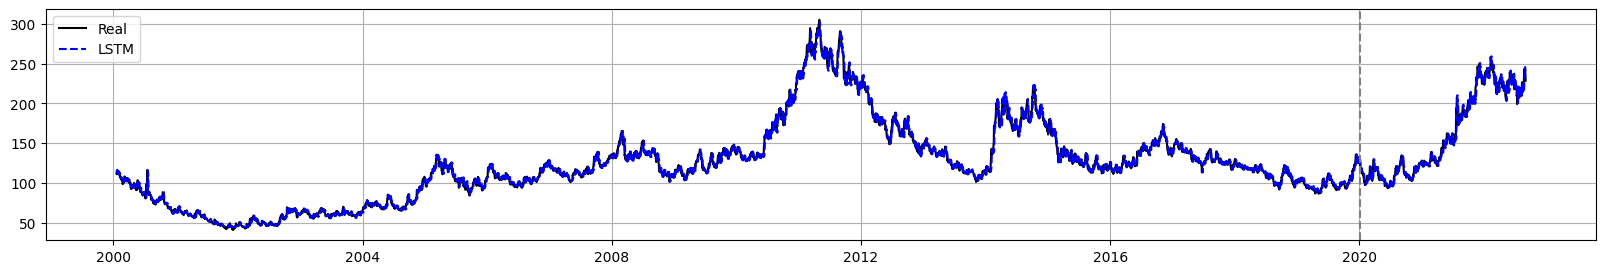

In [66]:
plt.figure(figsize = (20 , 3))
plt.plot(data_daily['Date'], data_daily['Real'], 'black', label = 'Real')
plt.plot(data_daily['Date'], data_daily['LSTM'], 'blue', label = 'LSTM', linestyle = '--')
#plt.plot(data_daily['Date'], data_daily['ARIMA'], 'green', label = 'ARIMA')
plt.axvline(x = datetime.datetime(2020,1,2), color = 'grey', linestyle = '--')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

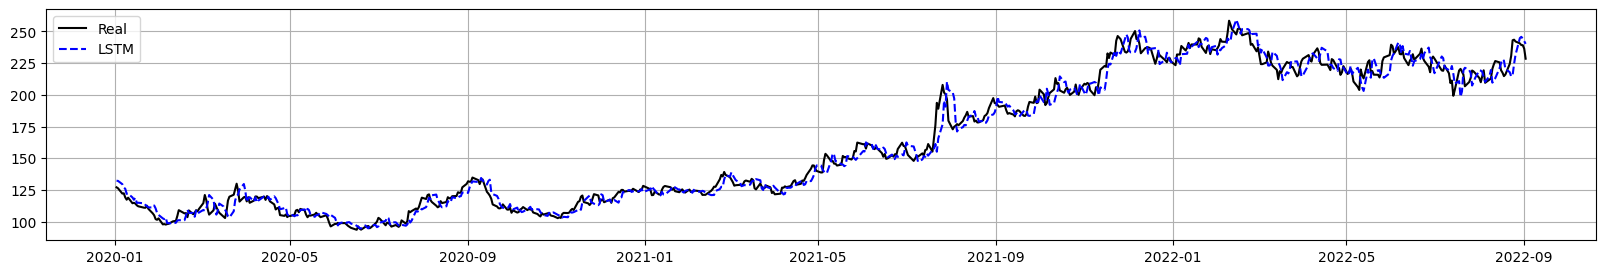

In [65]:
plt.figure(figsize = (20 , 3))
plt.plot(data_daily['Date'][test_idx:], data_daily['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data_daily['Date'][test_idx:], data_daily['LSTM'][test_idx:], 'blue', label = 'LSTM', linestyle = '--')
# plt.plot(data_daily['Date'][test_idx:], data_daily['ARIMA'][test_idx:], 'green', label = 'ARIMA')
plt.grid()
plt.legend()
plt.show()

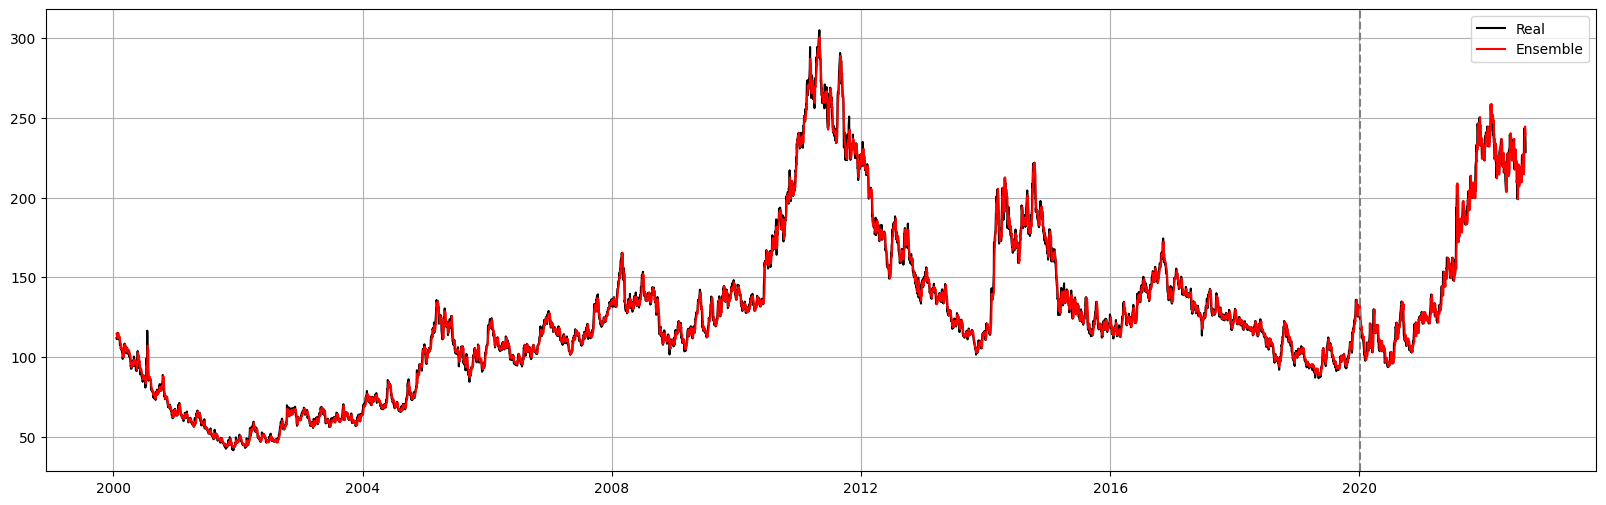

In [15]:
plt.figure(figsize = (20 , 6))
plt.plot(data_daily['Date'], data_daily['Real'], 'black', label = 'Real')
plt.plot(data_daily['Date'], data_daily['Ensemble'], 'red', label = 'Ensemble')
plt.axvline(x = datetime.datetime(2020,1,2), color = 'grey', linestyle = '--')
plt.grid()
plt.legend()
plt.show()

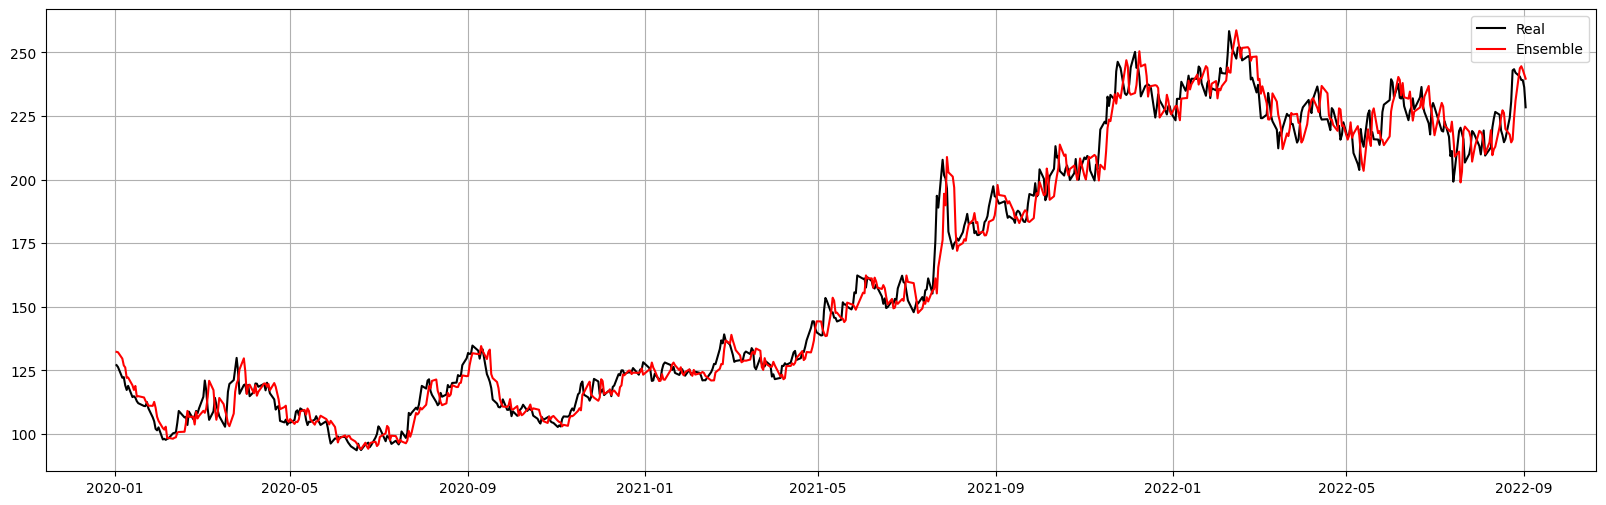

In [20]:
plt.figure(figsize = (20 , 6))
plt.plot(data_daily['Date'][test_idx:], data_daily['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data_daily['Date'][test_idx:], data_daily['Ensemble'][test_idx:], 'red', label = 'Ensemble')
plt.grid()
plt.legend()
plt.show()

In [22]:
MSE = mean_squared_error
MAE = mean_absolute_error

In [26]:
print('Baseline MSE =', MSE(data_daily['Real'][test_idx:], data_daily['Real'][test_idx-3:-3]))
print('ARIMA MSE =', MSE(data_daily['Real'][test_idx:], data_daily['ARIMA'][test_idx:]))
print('LSTM MSE =', MSE(data_daily['Real'][test_idx:], data_daily['LSTM'][test_idx:]))
print('Ensemble MSE =', MSE(data_daily['Real'][test_idx:], data_daily['Ensemble'][test_idx:]))

Baseline MSE = 46.331489910979236
ARIMA MSE = 46.33161659722042
LSTM MSE = 47.34383192722939
Ensemble MSE = 46.756162546593174


In [27]:
print('Baseline MAE =', MAE(data_daily['Real'][test_idx:], data_daily['Real'][test_idx-3:-3]))
print('ARIMA MAE =', MAE(data_daily['Real'][test_idx:], data_daily['ARIMA'][test_idx:]))
print('LSTM MAE =', MAE(data_daily['Real'][test_idx:], data_daily['LSTM'][test_idx:]))
print('Ensemble MAE =', MAE(data_daily['Real'][test_idx:], data_daily['Ensemble'][test_idx:]))

Baseline MAE = 5.050326409495549
ARIMA MAE = 5.051730421050168
LSTM MAE = 5.122264622154505
Ensemble MAE = 5.082162687732257


# Monthly Data

## 一步預測

In [28]:
data_month = pd.read_csv('/content/drive/MyDrive/Time Series/Final_TS/prediction/monthly_1step_pred.csv')
data_month['Date'] = pd.to_datetime(data_month['Date'], format='%Y-%m-%d')
data_month['Ensemble'] = (data_month['LSTM'] + data_month['ARIMA']) / 2
data_month

,Date,Real,LSTM,ARIMA,Ensemble
0,2000-04-30,96.539474,105.047498,104.306520,104.677009
1,2000-05-31,96.934091,97.650301,94.901403,96.275852
2,2000-06-30,89.218182,98.059859,97.070779,97.565319
3,2000-07-31,91.594737,89.689912,87.659856,88.674884
4,2000-08-31,79.510870,92.207033,92.145629,92.176331
...,...,...,...,...,...
265,2022-05-31,218.082381,219.868656,226.395086,223.131871
266,2022-06-30,230.292857,214.154856,216.807097,215.480976
267,2022-07-31,215.447500,229.038587,233.110905,231.074746
268,2022-08-31,224.221739,211.303467,212.857915,212.080691


In [51]:
test_idx = data_month[data_month['Date'] == '2020-01-31'].index.values[0]

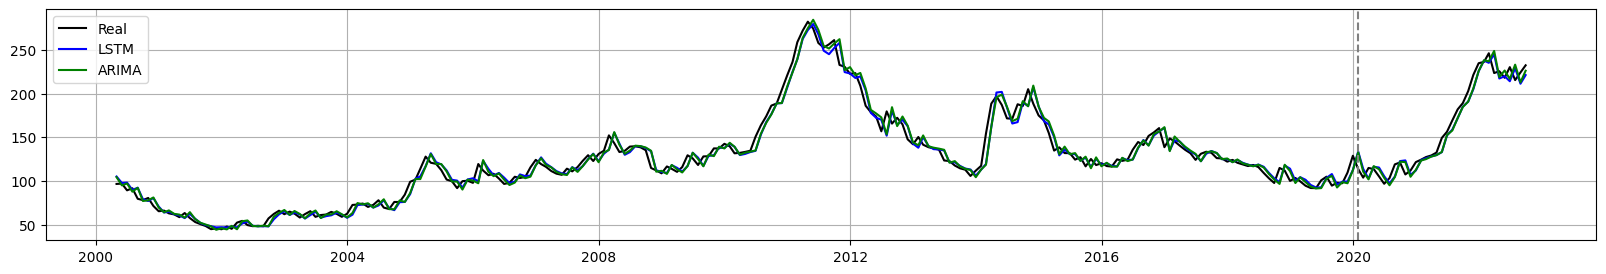

In [52]:
plt.figure(figsize = (20 , 3))
plt.plot(data_month['Date'], data_month['Real'], 'black', label = 'Real')
plt.plot(data_month['Date'], data_month['LSTM'], 'blue', label = 'LSTM')
plt.plot(data_month['Date'], data_month['ARIMA'], 'green', label = 'ARIMA')
plt.axvline(x = datetime.datetime(2020,1,31), color = 'grey', linestyle = '--')
plt.grid()
plt.legend()
plt.show()

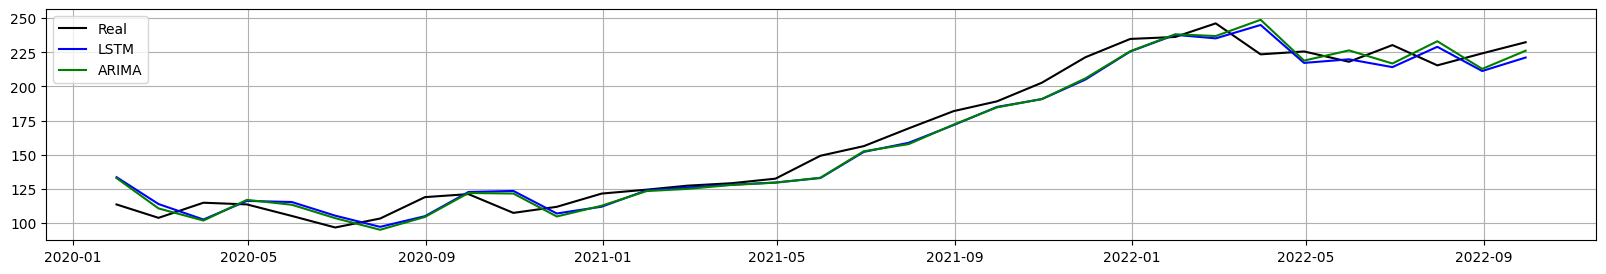

In [53]:
plt.figure(figsize = (20 , 3))
plt.plot(data_month['Date'][test_idx:], data_month['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data_month['Date'][test_idx:], data_month['LSTM'][test_idx:], 'blue', label = 'LSTM')
plt.plot(data_month['Date'][test_idx:], data_month['ARIMA'][test_idx:], 'green', label = 'ARIMA')
plt.grid()
plt.legend()
plt.show()

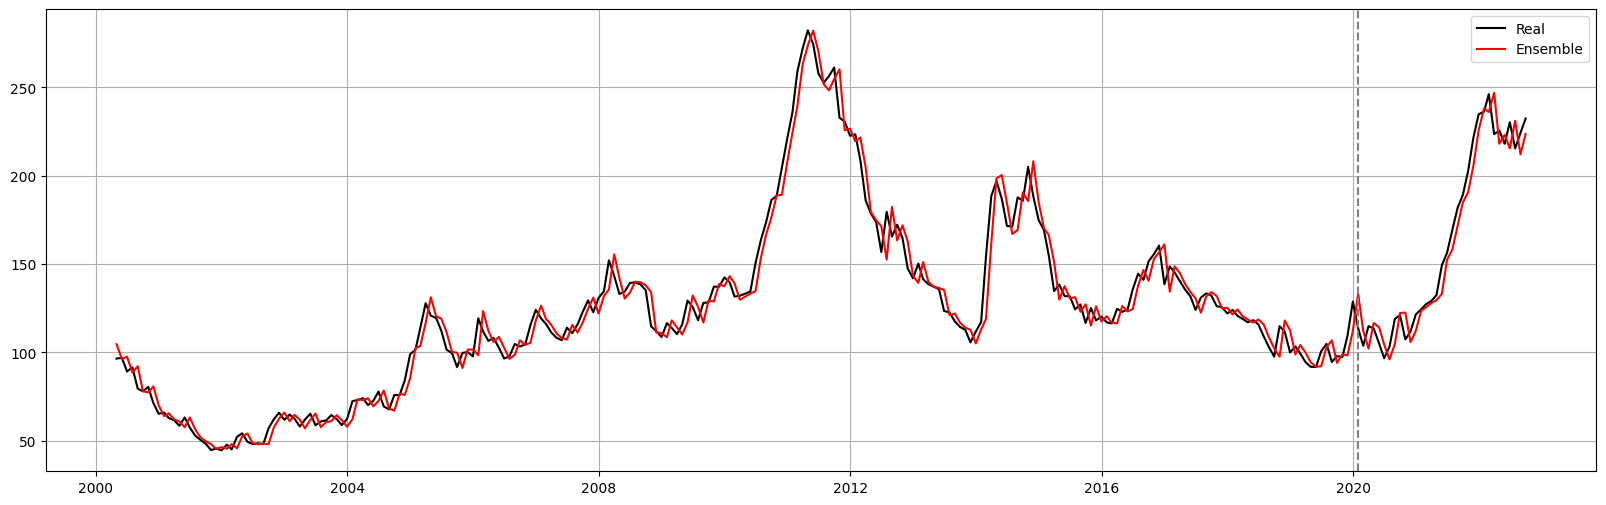

In [33]:
plt.figure(figsize = (20 , 3))
plt.plot(data_month['Date'], data_month['Real'], 'black', label = 'Real')
plt.plot(data_month['Date'], data_month['Ensemble'], 'red', label = 'Ensemble')
plt.axvline(x = datetime.datetime(2020,1,31), color = 'grey', linestyle = '--')
plt.grid()
plt.legend()
plt.show()

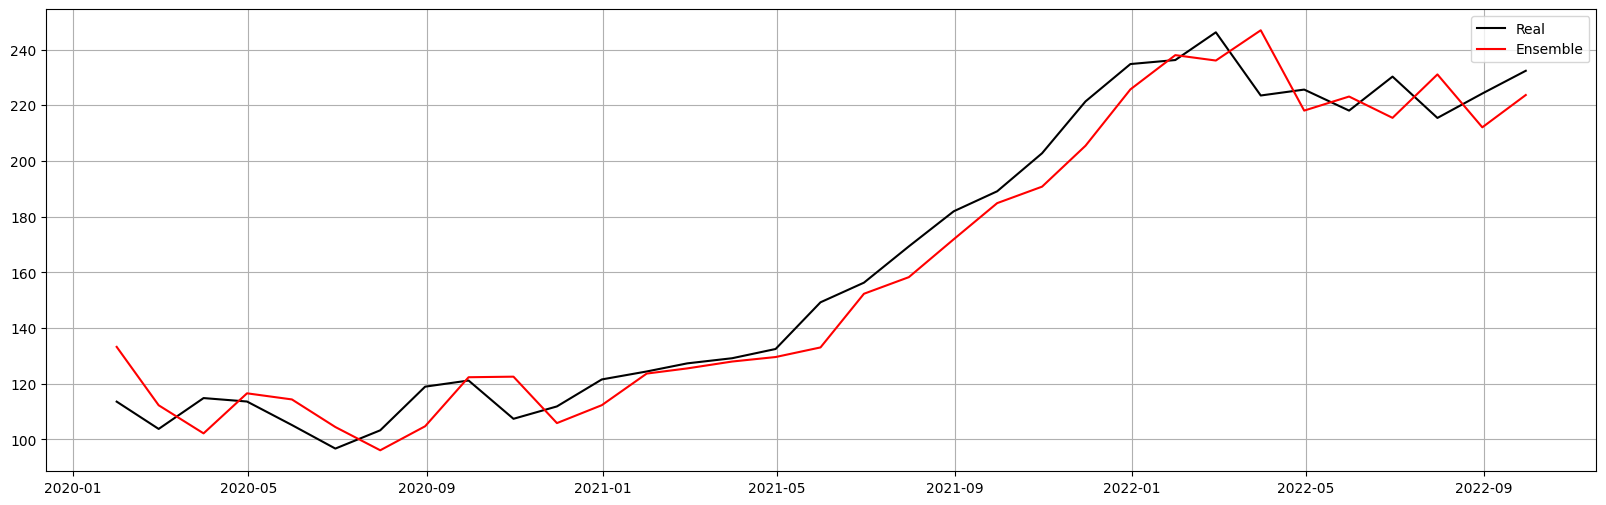

In [34]:
plt.figure(figsize = (20 , 6))
plt.plot(data_month['Date'][test_idx:], data_month['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data_month['Date'][test_idx:], data_month['Ensemble'][test_idx:], 'red', label = 'Ensemble')
plt.grid()
plt.legend()
plt.show()

In [36]:
print('Baseline MSE =', MSE(data_month['Real'][test_idx:], data_month['Real'][test_idx-1:-1]))
print('ARIMA MSE =', MSE(data_month['Real'][test_idx:], data_month['ARIMA'][test_idx:]))
print('LSTM MSE =', MSE(data_month['Real'][test_idx:], data_month['LSTM'][test_idx:]))
print('Ensemble MSE =', MSE(data_month['Real'][test_idx:], data_month['Ensemble'][test_idx:]))

Baseline MSE = 116.30098764089944
ARIMA MSE = 116.24373726197035
LSTM MSE = 117.25321902493994
Ensemble MSE = 115.60314545074425


In [37]:
print('Baseline MAE =', MAE(data_month['Real'][test_idx:], data_month['Real'][test_idx-1:-1]))
print('ARIMA MAE =', MAE(data_month['Real'][test_idx:], data_month['ARIMA'][test_idx:]))
print('LSTM MAE =', MAE(data_month['Real'][test_idx:], data_month['LSTM'][test_idx:]))
print('Ensemble MAE =', MAE(data_month['Real'][test_idx:], data_month['Ensemble'][test_idx:]))

Baseline MAE = 9.321293568392177
ARIMA MAE = 9.131537190673049
LSTM MAE = 9.174506910594125
Ensemble MAE = 9.15302205063359


## 三步預測

In [38]:
data3_month = pd.read_csv('/content/drive/MyDrive/Time Series/Final_TS/prediction/monthly_3step_pred.csv')
data3_month['Date'] = pd.to_datetime(data3_month['Date'], format = '%Y-%m-%d')
data3_month['Ensemble'] = (data3_month['LSTM'] + data3_month['ARIMA']) / 2
data3_month

,Date,Real,LSTM,ARIMA,Ensemble
0,2000-06-30,89.218182,108.046754,97.070779,102.558767
1,2000-07-31,91.594737,98.370228,87.659856,93.015042
2,2000-08-31,79.510870,101.482239,92.145629,96.813934
3,2000-09-30,78.015000,90.394688,77.039686,83.717187
4,2000-10-31,80.479545,96.140813,77.756597,86.948705
...,...,...,...,...,...
263,2022-05-31,218.082381,237.410128,250.413998,243.912063
264,2022-06-30,230.292857,205.090397,218.374184,211.732290
265,2022-07-31,215.447500,206.777932,227.297626,217.037779
266,2022-08-31,224.221739,204.938981,217.130209,211.034595


In [54]:
test_idx = data3_month[data3_month['Date'] == '2020-01-31'].index.values[0]

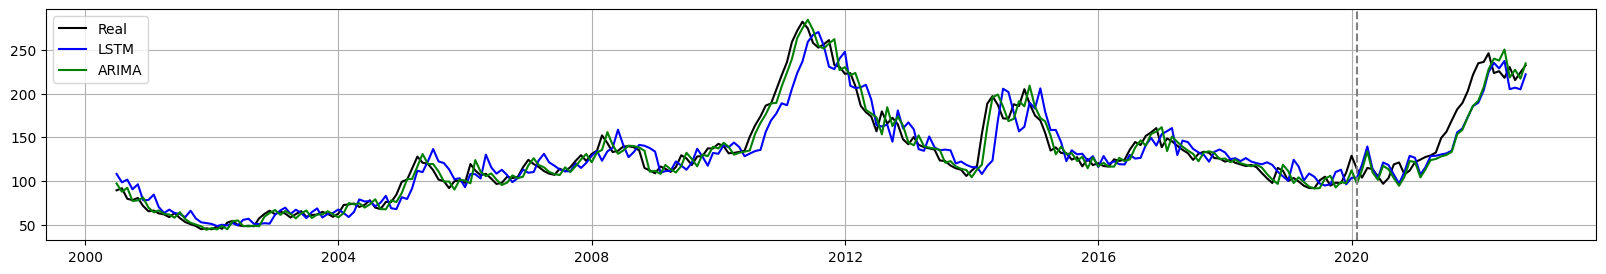

In [55]:
plt.figure(figsize = (20 , 3))
plt.plot(data3_month['Date'], data3_month['Real'], 'black', label = 'Real')
plt.plot(data3_month['Date'], data3_month['LSTM'], 'blue', label = 'LSTM')
plt.plot(data3_month['Date'], data3_month['ARIMA'], 'green', label = 'ARIMA')
plt.axvline(x = datetime.datetime(2020,1,31), color = 'grey', linestyle = '--')
plt.grid()
plt.legend()
plt.show()

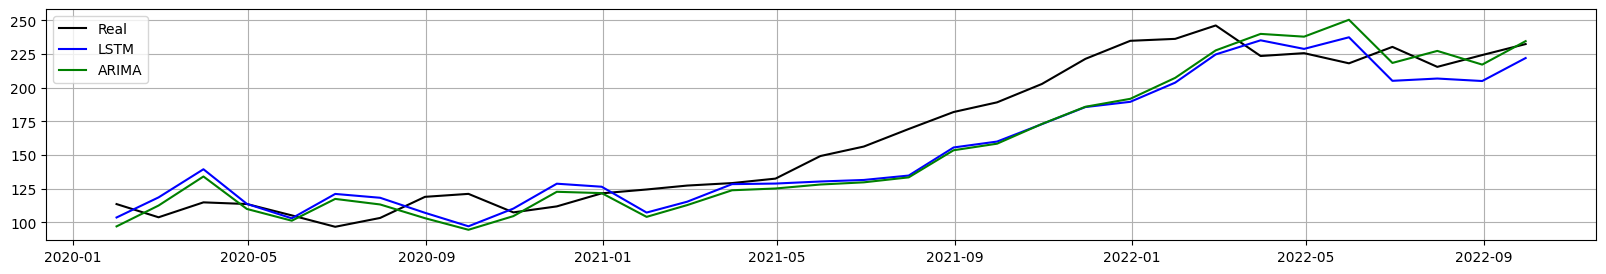

In [56]:
plt.figure(figsize = (20 , 3))
plt.plot(data3_month['Date'][test_idx:], data3_month['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data3_month['Date'][test_idx:], data3_month['LSTM'][test_idx:], 'blue', label = 'LSTM')
plt.plot(data3_month['Date'][test_idx:], data3_month['ARIMA'][test_idx:], 'green', label = 'ARIMA')
plt.grid()
plt.legend()
plt.show()

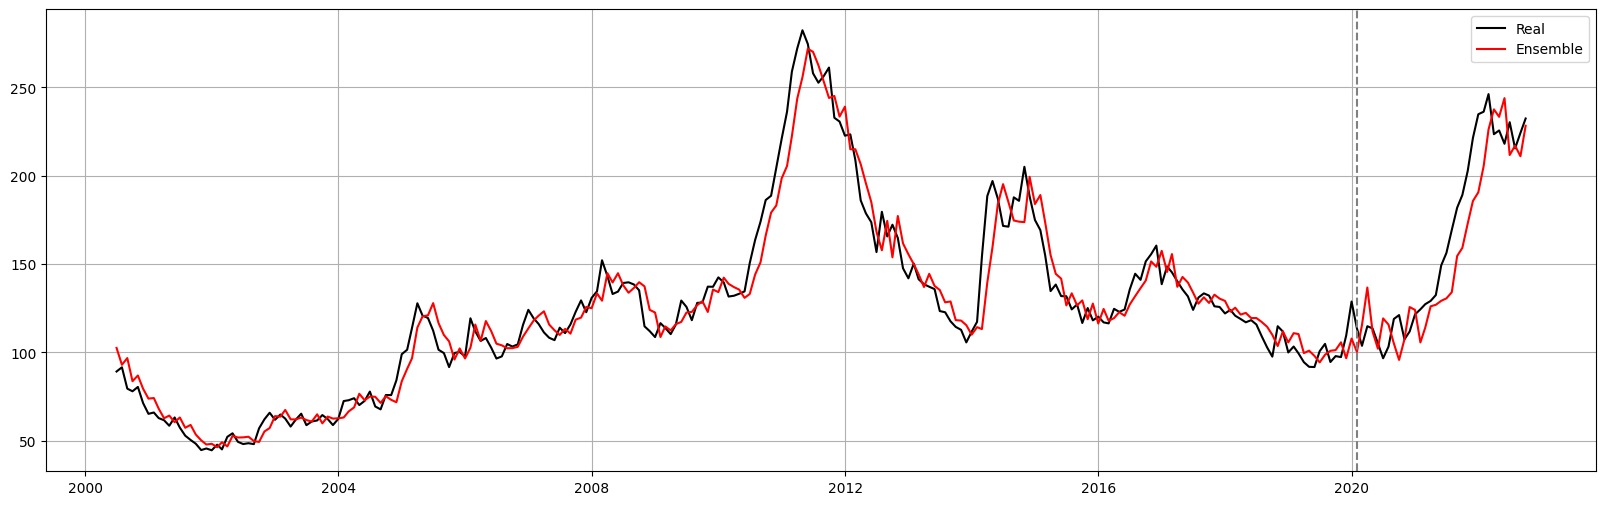

In [43]:
plt.figure(figsize = (20 , 6))
plt.plot(data3_month['Date'], data3_month['Real'], 'black', label = 'Real')
plt.plot(data3_month['Date'], data3_month['Ensemble'], 'red', label = 'Ensemble')
plt.axvline(x = datetime.datetime(2020,1,31), color = 'grey', linestyle = '--')
plt.grid()
plt.legend()
plt.show()

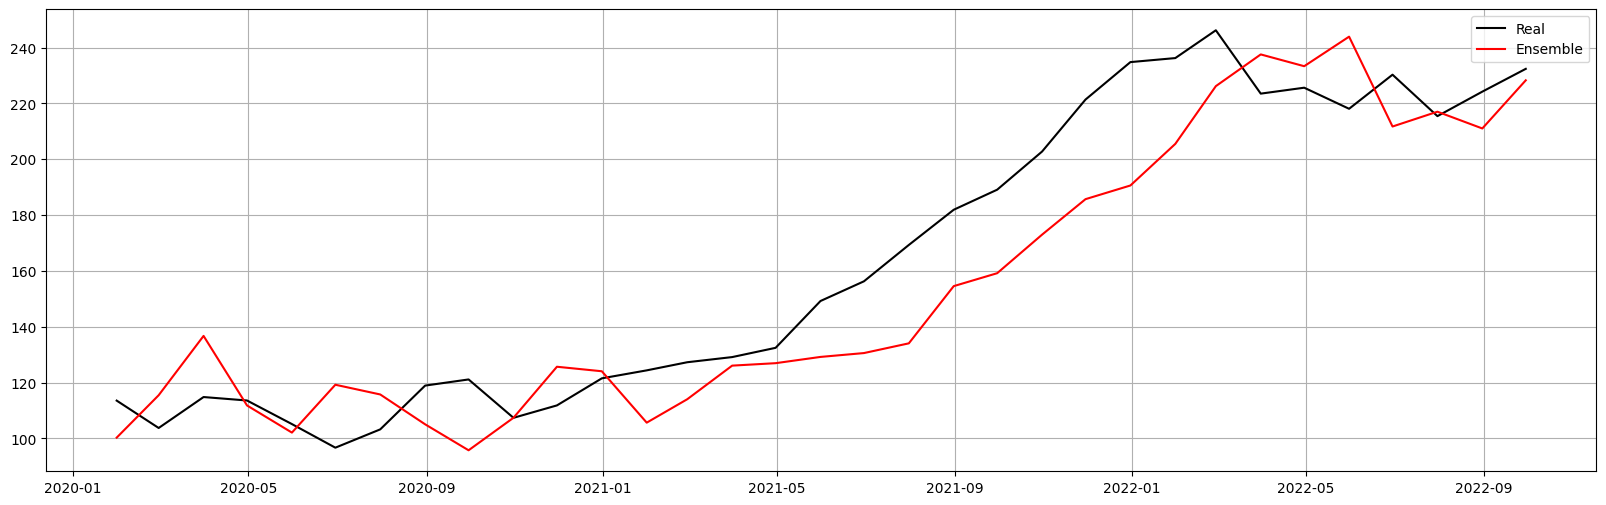

In [44]:
plt.figure(figsize = (20 , 6))
plt.plot(data3_month['Date'][test_idx:], data3_month['Real'][test_idx:], 'black', label = 'Real')
plt.plot(data3_month['Date'][test_idx:], data3_month['Ensemble'][test_idx:], 'red', label = 'Ensemble')
plt.grid()
plt.legend()
plt.show()

In [46]:
print('Baseline MSE =', MSE(data3_month['Real'][test_idx:], data3_month['Real'][test_idx-3:-3]))
print('ARIMA MSE =', MSE(data3_month['Real'][test_idx:], data3_month['ARIMA'][test_idx:]))
print('LSTM MSE =', MSE(data3_month['Real'][test_idx:], data3_month['LSTM'][test_idx:]))
print('Ensemble MSE =', MSE(data3_month['Real'][test_idx:], data3_month['Ensemble'][test_idx:]))

Baseline MSE = 450.8170472000687
ARIMA MSE = 431.7422853752759
LSTM MSE = 436.1331453288682
Ensemble MSE = 422.19872026482716


In [48]:
print('Baseline MAE =', MAE(data3_month['Real'][test_idx:], data3_month['Real'][test_idx-3:-3]))
print('ARIMA MAE =', MAE(data3_month['Real'][test_idx:], data3_month['ARIMA'][test_idx:]))
print('LSTM MAE =', MAE(data3_month['Real'][test_idx:], data3_month['LSTM'][test_idx:]))
print('Ensemble MAE =', MAE(data3_month['Real'][test_idx:], data3_month['Ensemble'][test_idx:]))

Baseline MAE = 17.192964675282656
ARIMA MAE = 17.55035402868931
LSTM MAE = 17.616831063321467
Ensemble MAE = 17.167702913941056
